# Independtly and identically distributed
- 서로 독립이고 각각 동일한 확률 분포를 따르는 다차원 확률변수
- 동일한 조건 아래에서 수행되는 실험이나 관측을 여러번 반복하여 데이터를 얻는 것

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

np.random.seed(0)
%precision 3
%matplotlib inline

In [3]:
linestyles = ['-', '--', ':', '-.']

def E(XY, g):
    x_set, y_set, f_XY = XY
    return np.sum([g(x_i, y_j) * f_XY(x_i, y_j)
                   for x_i in x_set for y_j in y_set])

def Cov(XY):
    x_set, y_set, f_XY = XY
    mean_X = E(XY, lambda x, y: x)
    mean_Y = E(XY, lambda x, y: y)
    return np.sum([(x_i-mean_X) * (y_j-mean_Y) * f_XY(x_i, y_j)
                    for x_i in x_set for y_j in y_set])

def f_X(x):
    return np.sum([f_XY(x, y_k) for y_k in y_set])

def f_Y(y):
    return np.sum([f_XY(x_k, y) for x_k in x_set])

# 9.1 Independence

### 9.1.2 Independence and 무상관성 
- 두 확률변수 사이에 선형적인 관계가 없다
- 독립 -> 무상관 ( 100 % ) 독립이 조금 더 강한 개념이다
- 무상관 -> 독립 ( 100 % x )

##
두 확률 변수 사이에 선형 관계가 없더라도(무상관) 서로 영향을 끼치는 경우가 있다(독립이 아닌경우)

In [ ]:
# Random variable X and Y are independent 
x_set = np.array([1,2,3,4,5,6])
y_set = np.array([1,2,3,4,5,6])

def f_XY(x, y):
    if x in x_set and y in y_set :
        return x * y / 441
    else :
        return 0

XY = [x_set, y_set, f_XY]

In [ ]:
Cov(XY) # Uncorrelated 

-0.000

In [6]:
x_set = np.array([0, 1])
y_set = np.array([-1, 0, 1])

def f_XY(x, y) :
    if (x, y) in [(0, 0), (1, 1), (1, -1)]:
        return 1 / 3
    else :
        return 0
    
XY = [x_set, y_set, f_XY]

In [ ]:
Cov(XY) # Uncorrelated 

0.000

In [8]:
f_X(0) * f_Y(0), f_XY(0, 0)
# 1/9 , 1/3
# Not equal -> dependent

(0.111, 0.333)

## 9.2 Distribution of the sum
- 서로 독립이고 동일한 확률 분포를 따르는 '확률변수 X1, X2, ...의 합'이 따르는 확률 분포를 말함
- 합의 분포 → 표본 평균의 분포

- 기댓값은 선형성이 성립한다. 선형성을 n차원으로 확장 하면 E(X1,+ X2+ ... Xn) = E(X1) + E(X2) ...
- 분산도 V(X1 + X2 + X3  + ... + Xn) = V(X1) + V(X2)+ ... + V(Xn)
    - Random variables are independent → uncorrelated → covariance = 0

### 9.2.1 Sum of normal distributions

In [ ]:
rv1 = stats.norm(1, np.sqrt(2))
rv2 = stats.norm(2, np.sqrt(3))

sample_size = int(1e6)
X_sample = rv1.rvs(sample_size) # rvs : Random variates Sampling
Y_sample = rv2.rvs(sample_size)

sum_sample = X_sample + Y_sample 
 
np.mean(sum_sample) # 1+2 
np.var(sum_sample) # 2+3

(3.001, 5.002)

- 정규 분포의 경우 정규 분포의 합도 정규분포가 됨
    - 재생성(reproductive property) : 동일한 분포를 따르는 2개의 독립된 확률 변수에 대해서 그 합도 동릴한 확률분포가 되는 성질 
    - 모든 확률 분포가 재생성을 갖는 것은 아니다 

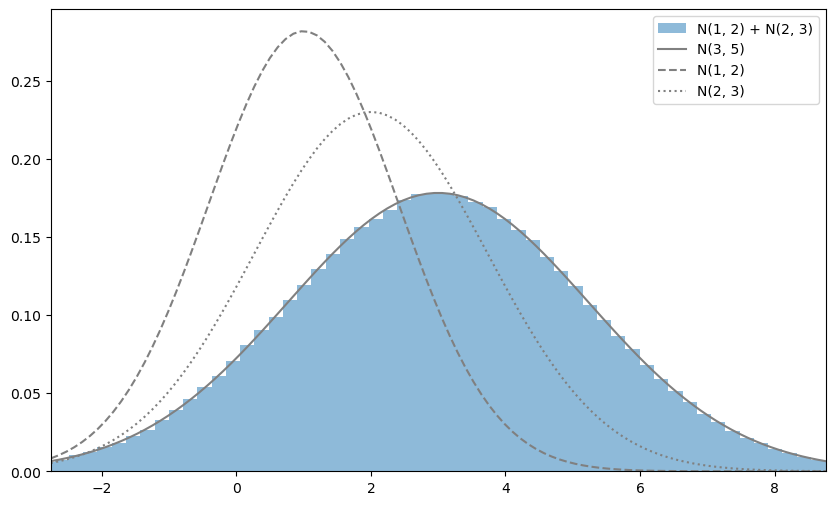

In [ ]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

rv = stats.norm(3, np.sqrt(5))
xs = np.linspace(rv.isf(0.995), rv.isf(0.005), 100)
# rv.isf(0.995) ~ rv.isf(0.005) 범위에서 100개 점 생성

ax.hist(sum_sample, bins=100, density=True,
        alpha=0.5, label='N(1, 2) + N(2, 3)')
ax.plot(xs, rv.pdf(xs), label='N(3, 5)', color='gray')
ax.plot(xs, rv1.pdf(xs), label='N(1, 2)', ls='--', color='gray')
ax.plot(xs, rv2.pdf(xs), label='N(2, 3)', ls=':', color='gray' )

ax.legend()
ax.set_xlim(rv.isf(0.995), rv.isf(0.005))
plt.show()

# X + Y ~ N(3, 5)

### 9.2.2 Sum of Poisson distributions

In [ ]:
rv1 = stats.poisson(3)
rv2 = stats.poisson(4)

sample_size = int(1e6)
X_sample = rv1.rvs(sample_size)
Y_sample = rv2.rvs(sample_size)
sum_sample = X_sample + Y_sample

np.mean(sum_sample), np.var(sum_sample) # 7, 7

(6.993, 7.003)

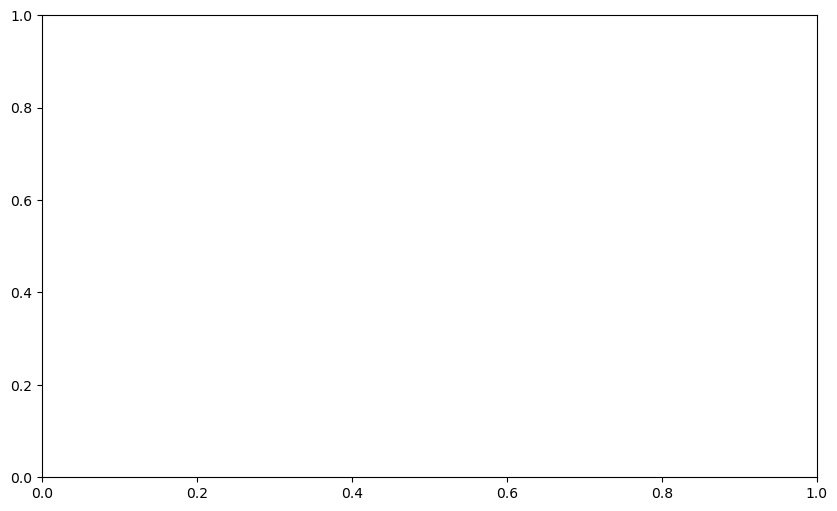

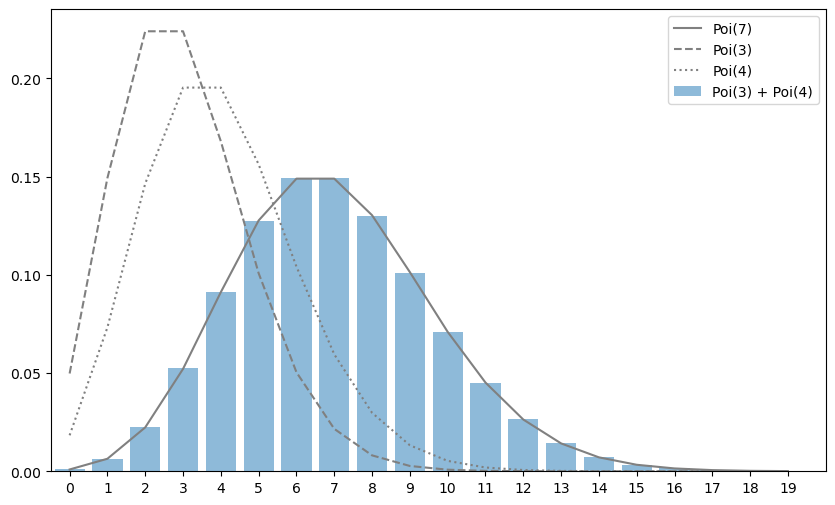

In [23]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

rv = stats.poisson(7)
xs = np.arange(20)
hist, _ = np.histogram(sum_sample, bins=20,
                       range=(0, 20), density=True)

ax.bar(xs, hist, alpha=0.5, label='Poi(3) + Poi(4)')
ax.plot(xs, rv.pmf(xs), label='Poi(7)',  color='gray')
ax.plot(xs, rv1.pmf(xs), label='Poi(3)', ls='--', color='gray')
ax.plot(xs, rv2.pmf(xs), label='Poi(4)', ls=':',  color='gray')

ax.legend()
ax.set_xlim(-0.5, 20)
ax.set_xticks(np.arange(20))
plt.show()

### 9.2.3. Sum of Bernoulli distributions

In [24]:
p = 0.3
rv = stats.bernoulli(p)

sample_size = int(1e6)
Xs_sample = rv.rvs((10, sample_size))
sum_sample = np.sum(Xs_sample, axis = 0)

np.mean(sum_sample), np.var(sum_sample)

(3.000, 2.097)

- 베르누이 분포는 재생성이 없고, 분포의 합은 이항분포가 된다

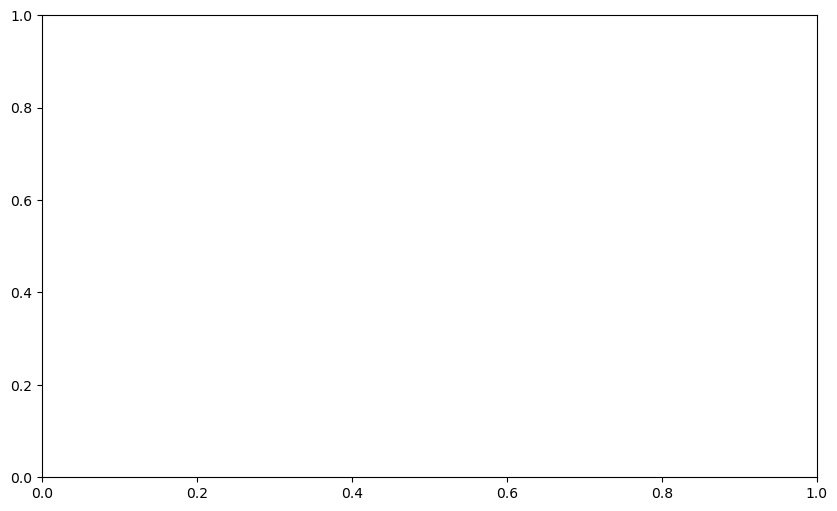

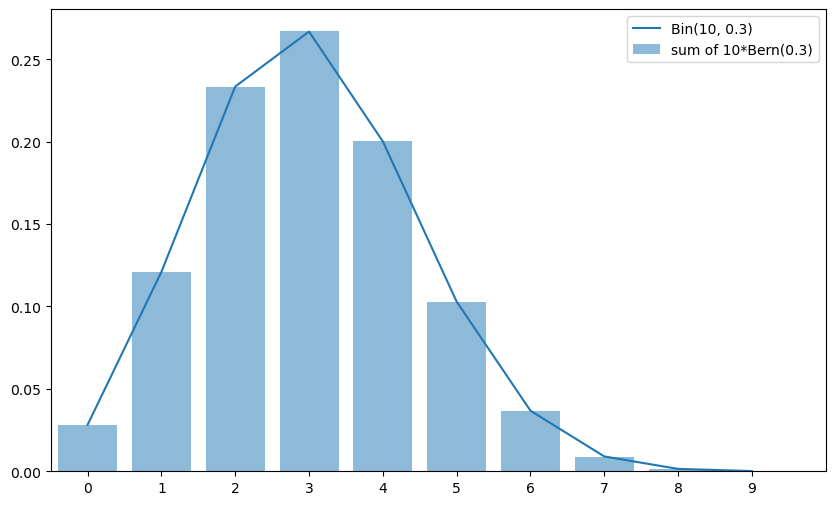

In [26]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

rv = stats.binom(10, p)
xs = np.arange(10)
hist, _ = np.histogram(sum_sample, bins=10,
                       range=(0, 10), density=True)
ax.bar(xs, hist, alpha=0.5, label='sum of 10*Bern(0.3)')
ax.plot(xs, rv.pmf(xs), label='Bin(10, 0.3)')
ax.legend()
ax.set_xlim(-0.5, 10)
ax.set_xticks(np.arange(10))
plt.show()

## 9.3 ⭐️ The sampling distribution of the sample mean
The sampling distribution of the sample mean approaches a normal distribution as the sample size increases, according to the central limit theorem.

서로 독립, 동일한 확률 분포를 따를 때 확률 변수가 따르는 표본평균의 분포

### 9.3.1 Normal distribtuion

In [ ]:
mean = 1
var = 2
rv = stats.norm(mean, np.sqrt(var))   #mean = 1, var 2 

n = 10
sample_size = int(1e6)
Xs_sample = rv.rvs((n, sample_size))
sample_mean = np.mean(Xs_sample, axis = 0)

np.mean(sample_mean), np.var(sample_mean) #mean = 1, var = 2 / 10

(1.000, 0.200)

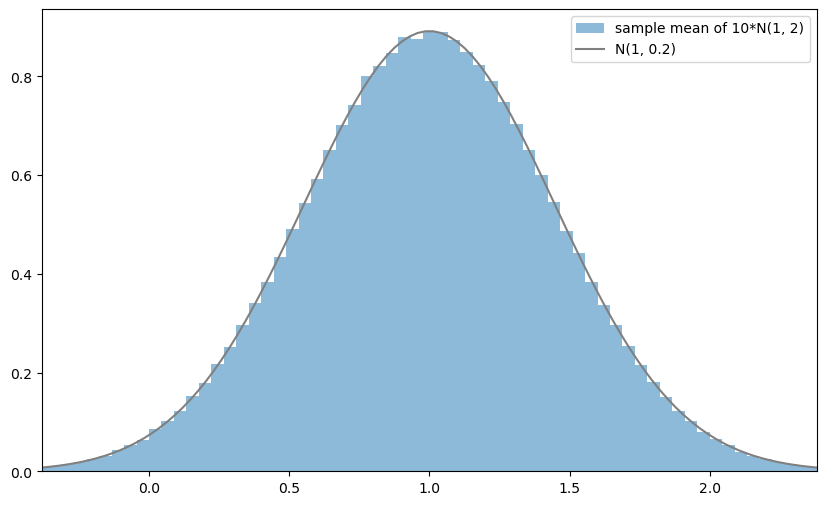

In [29]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

rv_true = stats.norm(mean, np.sqrt(var/n))
xs = np.linspace(rv_true.isf(0.999), rv_true.isf(0.001), 100)
ax.hist(sample_mean, bins=100, density=True,
        alpha=0.5, label='sample mean of 10*N(1, 2)')
ax.plot(xs, rv_true.pdf(xs), label='N(1, 0.2)', color='gray')

ax.legend()
ax.set_xlim(rv_true.isf(0.999), rv_true.isf(0.001))
plt.show()

### 9.3.2 Possion distribtuion

In [ ]:
l = 3
rv = stats.poisson(l)

n = 10
sample_size = int(1e6)
Xs_sample = rv.rvs((n, sample_size))
sample_mean = np.mean(Xs_sample, axis = 0)

np.mean(sample_mean), np.var(sample_mean)  # 3, 3 / 10

(3.000, 0.300)

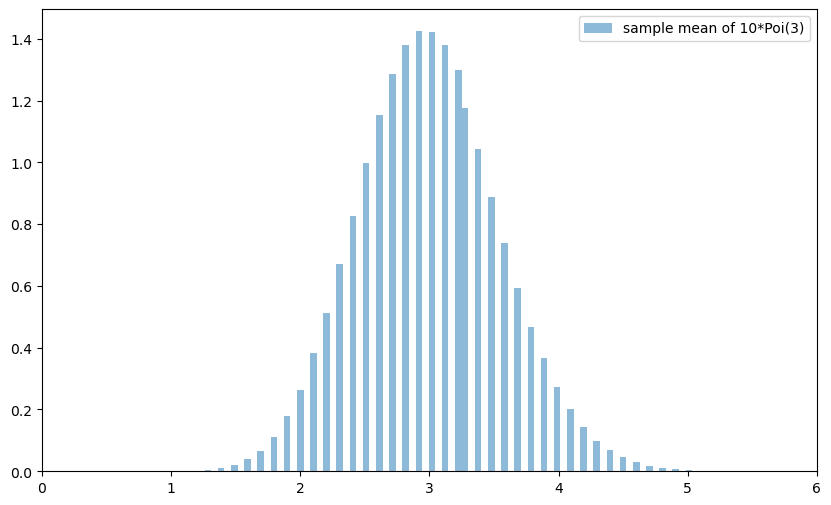

In [32]:
# Follow normal distribution
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

ax.hist(sample_mean, bins=100, density=True,
        alpha=0.5, label='sample mean of 10*Poi(3)')

ax.legend()
ax.set_xlim(0, 6)
plt.show()

### 9.3.3. Central Limit Theorem

In [36]:
l = 3
rv = stats.poisson(l)

n = 10000
sample_size = 10000
Xs_sample = rv.rvs((n, sample_size))
sample_mean = np.mean(Xs_sample, axis=0)

rv_true = stats.norm(l, np.sqrt(l/n))
xs = np.linspace(rv_true.isf(0.999), rv_true.isf(0.001), 100)


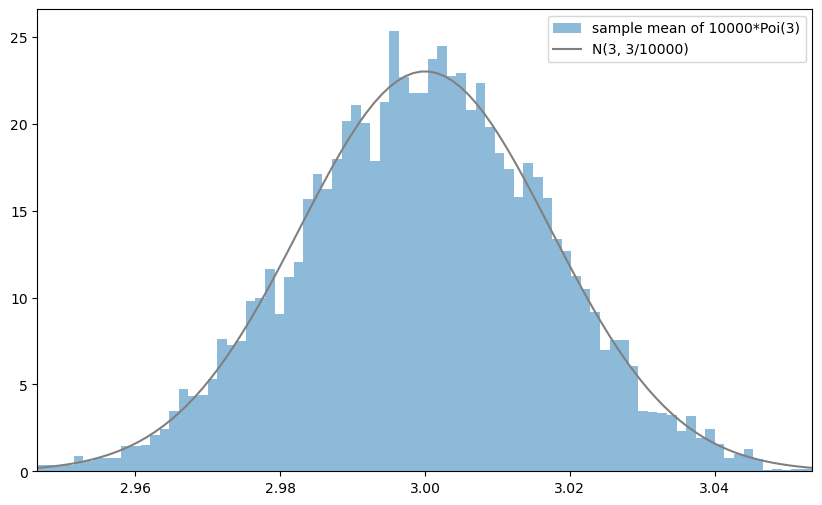

In [37]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

ax.hist(sample_mean, bins=100, density=True,
        alpha=0.5, label='sample mean of 10000*Poi(3)')
ax.plot(xs, rv_true.pdf(xs), label='N(3, 3/10000)', color='gray')

ax.legend()
ax.set_xlim(rv_true.isf(0.999), rv_true.isf(0.001))
plt.show()

### 9.3.4. Law of large numbers
- 표본 크기를 키우면 표본 평균은 모평균에 수렴한다

In [38]:
p = 1/6
rv = stats.bernoulli(p)

n = int(1e5)
sample = rv.rvs((n, 4))
space = np.linspace(100, n, 50).astype(int)
plot_list = np.array([np.mean(sample[:sp], axis=0)
                      for sp in space]).T

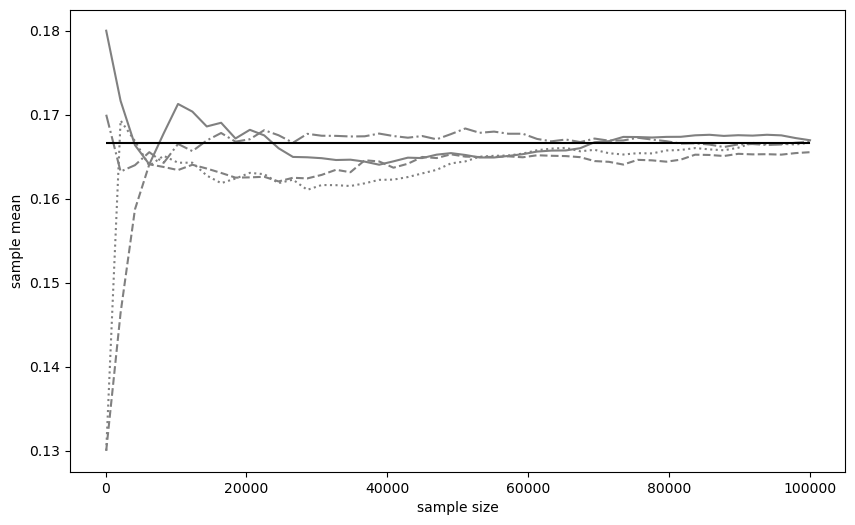

In [ ]:
# Almost close to 1/6
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

for pl, ls in zip(plot_list, linestyles):
    ax.plot(space, pl, ls=ls, color='gray')
ax.hlines(p, -1, n, 'k')
ax.set_xlabel('sample size')
ax.set_ylabel('sample mean')

plt.show()